<a href="https://colab.research.google.com/github/mohannashahrad/Borealis_AI_Plant_Tree_Project/blob/main/Training/TimeSeries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [66]:
# Import all the required libraries
import pandas as pd
import requests
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer    
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import xgboost as xgb

#Defining Functions


In [67]:
# Functions
def load_DF(url):
  data = StringIO(requests.get(url).text)
  return pd.read_csv(data)

def standardize(df,col_names):
  print(type(df))
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
  df.reset_index(inplace=True, drop=True)
  features = df[col_names]
  scaler = StandardScaler().fit(features.values)
  features = scaler.transform(features.values)
  df[col_names] = features
  return df

def oneHotEncode(df, discrete_columns):
  for var in discrete_columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df[[var]]).toarray())
    enc_df.columns = enc.get_feature_names([var])
    df = df.join(enc_df)
    df = df.drop([var], axis=1)
  return df

#Loading the Dataset

In [68]:
# Loading DataSet
df = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data2.csv')
df = df.iloc[: , 1:]
display(df.head())

,Time,Country Name,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
0,2001,Afghanistan,652860.0,377530.0,12084.4,21606992.0,3.902805,22.169,NaN,NaN,NaN,NaN,NaN,810.0,13490.0,88.092712
1,2002,Afghanistan,652860.0,377530.0,12084.4,22600774.0,4.496719,22.261,4.055180e+09,NaN,0.958004,0.004341,0.029101,1100.0,16090.0,178.640364
2,2003,Afghanistan,652860.0,379100.0,12084.4,23680871.0,4.668344,22.353,4.515559e+09,8.832278,0.664331,0.007422,0.026686,1350.0,16780.0,244.336255
3,2004,Afghanistan,652860.0,379110.0,12084.4,24726689.0,4.321560,22.500,5.226779e+09,1.414118,0.387787,0.016455,0.025399,1130.0,16520.0,201.444959
4,2005,Afghanistan,652860.0,379100.0,12084.4,25654274.0,3.682700,22.703,6.209138e+09,11.229715,0.332205,0.010904,0.025973,1640.0,17400.0,235.956834


#Preprocessing 

This section consists of data normalization and one-hot encoding for discrete features.

In [69]:
col_names = ['Land Area (m2)', 'Agriculture Land (m2)', 'Forest Land (m2)', 'Population', 'Pop Growth (%)', 'Urban Pop (%)',
                'GDP (US$)', 'GDP Growth (%)', 'Forest Rents (% GDP)', 'Coal Rents (% GDP)', 'Oil Rents (% GDP)', 'CO2 Emission (kt)',
                'GHG Emision (CO2 eqv)', 'Tree Loss (ha)']

df = standardize(df,col_names)
discrete_columns = ["Country Name"]
country_names = df['Country Name']
df = oneHotEncode(df,discrete_columns)
df.head(30)

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instea

,Time,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha),Country Name_Afghanistan,Country Name_Albania,Country Name_Algeria,Country Name_Angola,Country Name_Antigua and Barbuda,Country Name_Argentina,Country Name_Armenia,Country Name_Australia,Country Name_Austria,Country Name_Azerbaijan,"Country Name_Bahamas, The",Country Name_Bangladesh,Country Name_Barbados,Country Name_Belarus,Country Name_Belgium,Country Name_Belize,Country Name_Benin,Country Name_Bhutan,Country Name_Bolivia,Country Name_Bosnia and Herzegovina,Country Name_Botswana,Country Name_Brazil,Country Name_Brunei Darussalam,Country Name_Bulgaria,Country Name_Burkina Faso,...,Country Name_Senegal,Country Name_Serbia,Country Name_Seychelles,Country Name_Sierra Leone,Country Name_Singapore,Country Name_Slovak Republic,Country Name_Slovenia,Country Name_Solomon Islands,Country Name_South Africa,Country Name_South Sudan,Country Name_Spain,Country Name_Sri Lanka,Country Name_St. Kitts and Nevis,Country Name_St. Lucia,Country Name_St. Vincent and the Grenadines,Country Name_Sudan,Country Name_Suriname,Country Name_Sweden,Country Name_Switzerland,Country Name_Syrian Arab Republic,Country Name_Tajikistan,Country Name_Tanzania,Country Name_Thailand,Country Name_Timor-Leste,Country Name_Togo,Country Name_Trinidad and Tobago,Country Name_Tunisia,Country Name_Turkey,Country Name_Turkmenistan,Country Name_Uganda,Country Name_Ukraine,Country Name_United Kingdom,Country Name_United States,Country Name_Uruguay,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_Zambia,Country Name_Zimbabwe
0,2003,-0.053191,0.151565,-0.280729,-0.121892,2.833507,-1.488437,-0.252053,0.966200,-0.325614,-0.195424,-0.367831,-0.225766,-0.238114,-0.266975,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,-0.053191,0.151580,-0.280729,-0.114761,2.540205,-1.481744,-0.251572,-0.476629,-0.391587,-0.185539,-0.367980,-0.226046,-0.238385,-0.267067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2005,-0.053191,0.151565,-0.280729,-0.108437,1.999872,-1.472501,-0.250907,1.432500,-0.404847,-0.191614,-0.367914,-0.225396,-0.237467,-0.266993,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,-0.053191,0.151565,-0.280729,-0.103127,1.414446,-1.463213,-0.250391,0.290338,-0.375773,-0.191342,-0.368358,-0.225013,-0.233669,-0.267173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,-0.053191,0.151565,-0.280729,-0.098576,0.994354,-1.453834,-0.248513,1.937539,-0.402332,-0.119929,-0.369223,-0.224477,-0.229663,-0.266957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2008,-0.053191,0.151565,-0.280729,-0.094337,0.803583,-1.444410,-0.248268,0.011733,-0.399720,0.042073,-0.369056,-0.221887,-0.222715,-0.267268,1.0,0.0,0.0,0.0,0

# Time Series (ARIMA)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Time,Tree Loss (ha),Country
Country,,,
Afghanistan,2003,-0.266975,Afghanistan
Afghanistan,2004,-0.267067,Afghanistan
Afghanistan,2005,-0.266993,Afghanistan
Afghanistan,2006,-0.267173,Afghanistan
Afghanistan,2007,-0.266957,Afghanistan
...,...,...,...
Zimbabwe,2014,-0.246843,Zimbabwe
Zimbabwe,2015,-0.241238,Zimbabwe
Zimbabwe,2016,-0.244035,Zimbabwe


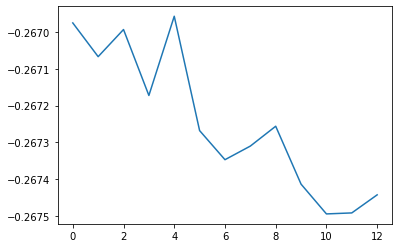

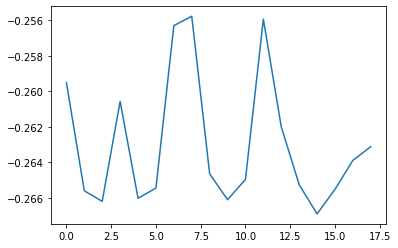

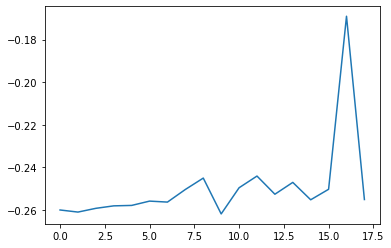

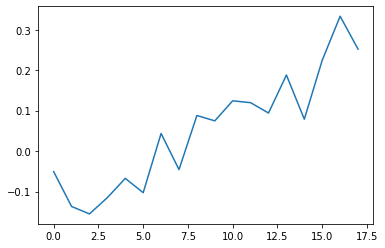

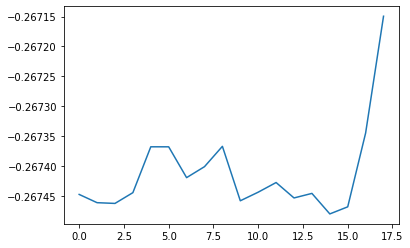

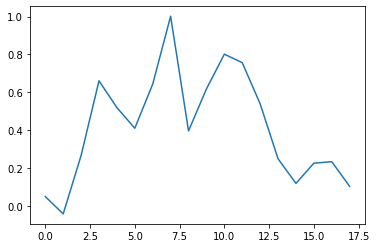

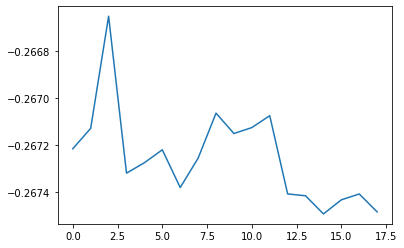

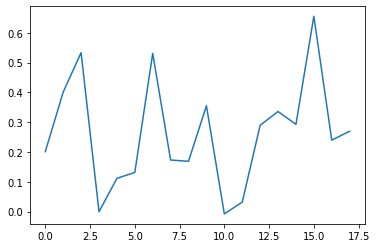

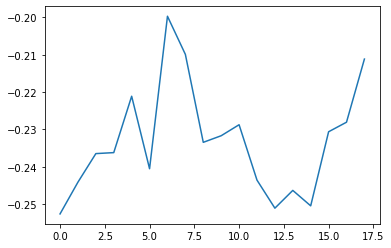

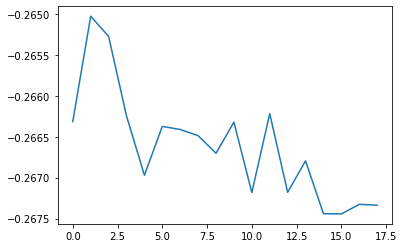

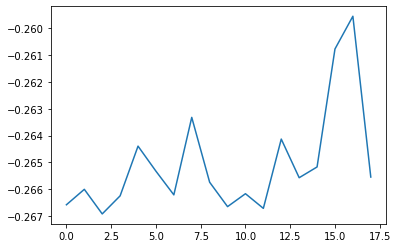

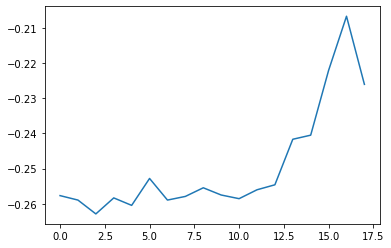

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


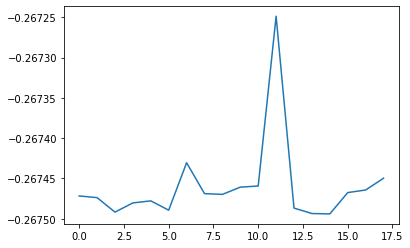

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


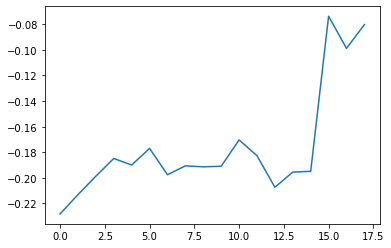

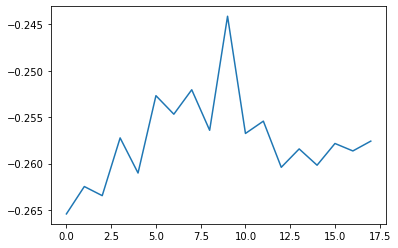

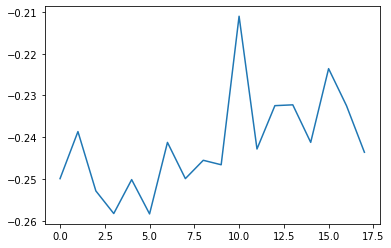

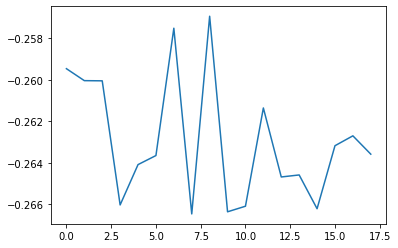

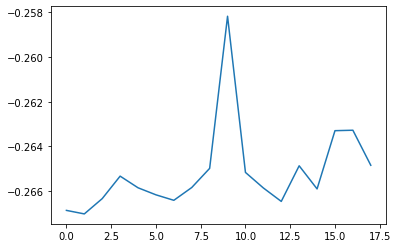

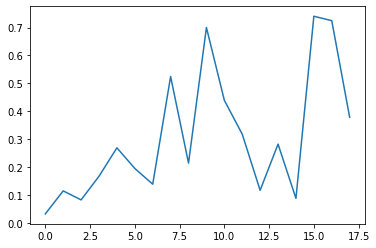

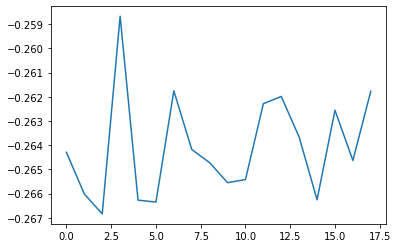

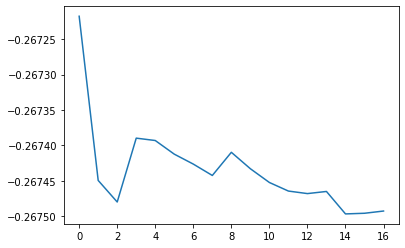

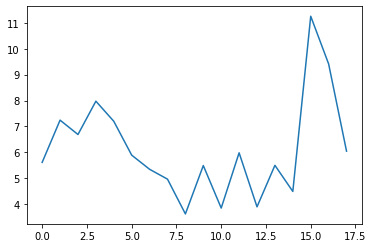

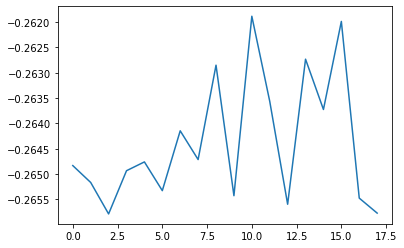

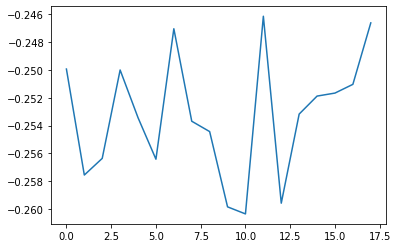

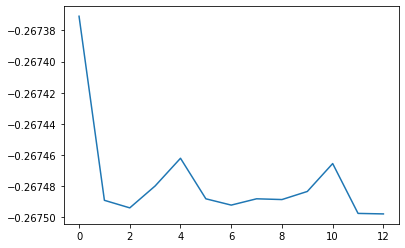

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


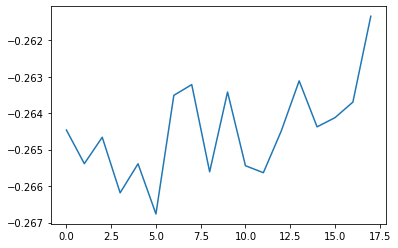

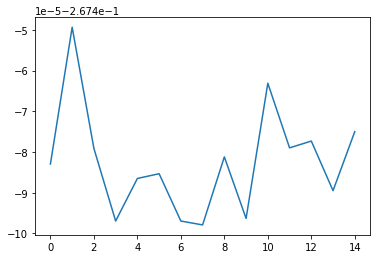

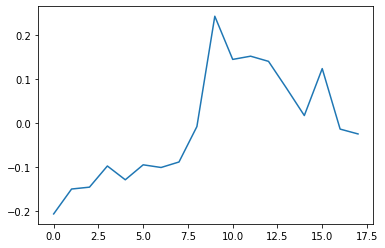

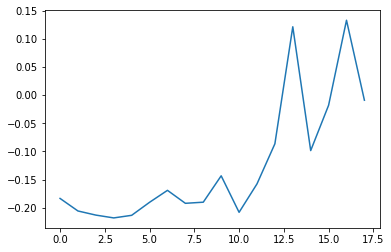

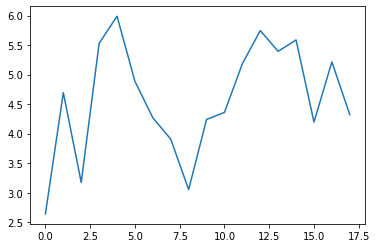

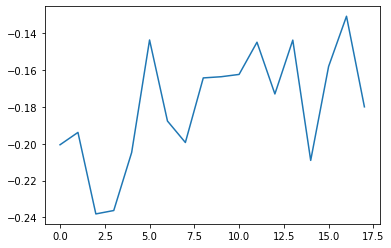

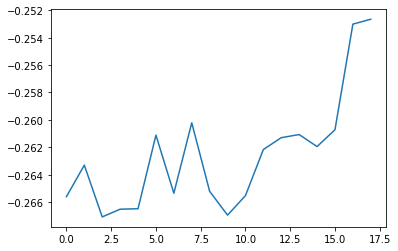

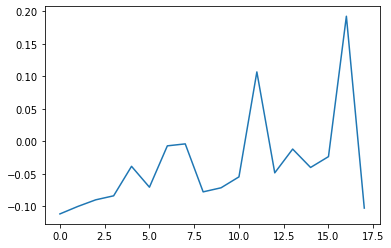

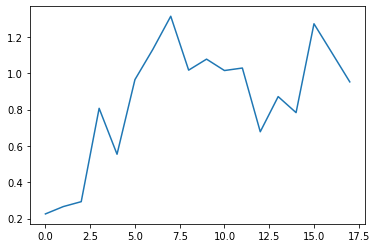

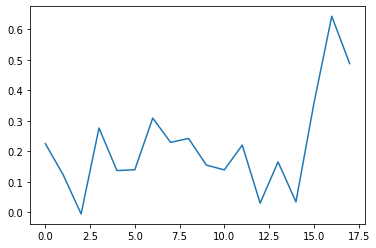

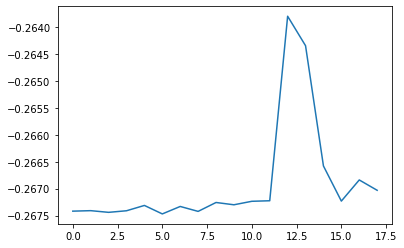

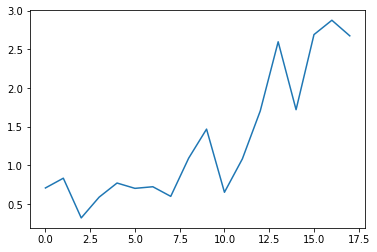

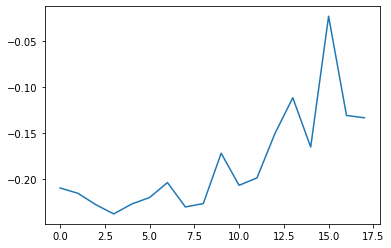

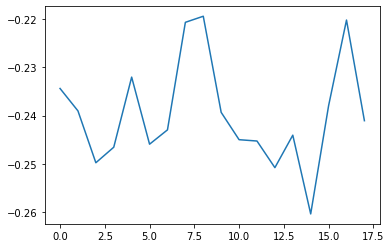

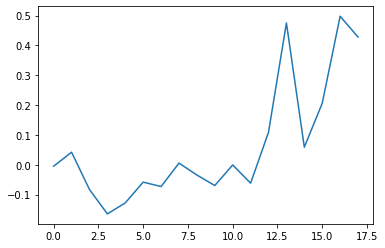

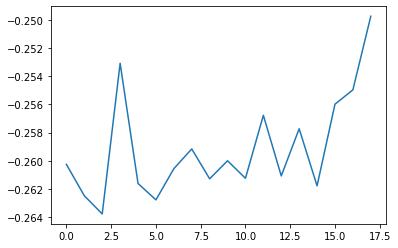

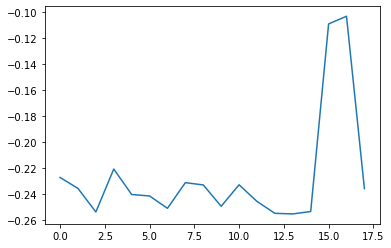

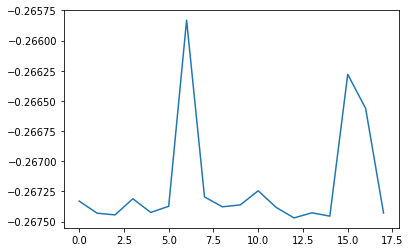

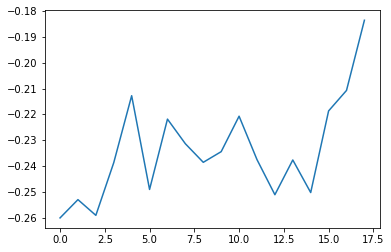

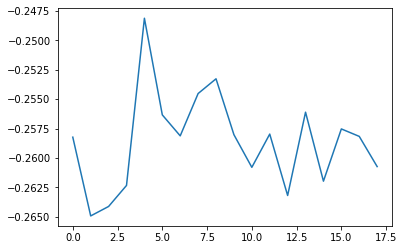

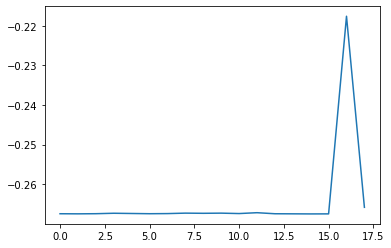

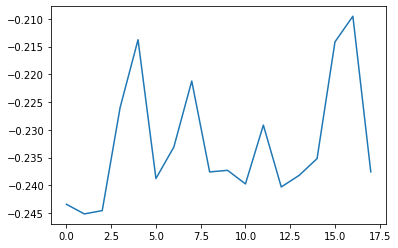

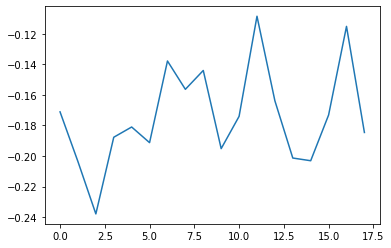

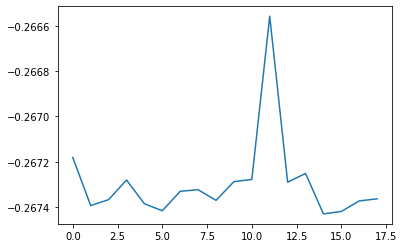

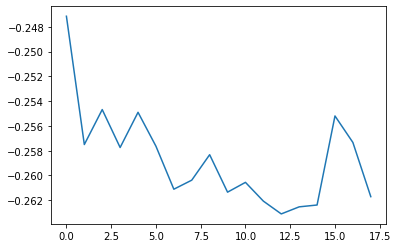

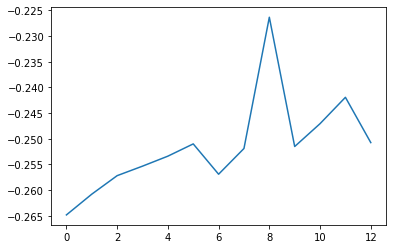

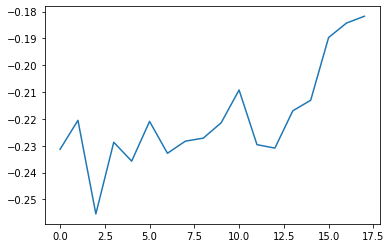

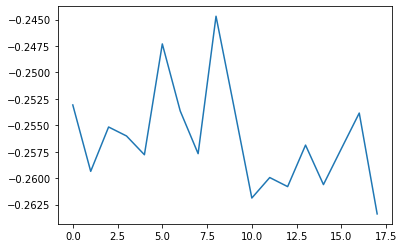

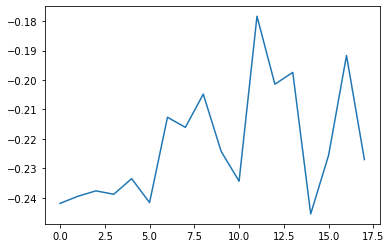

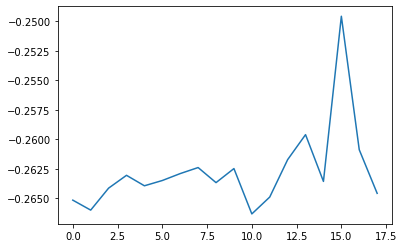

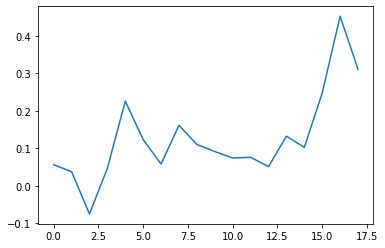

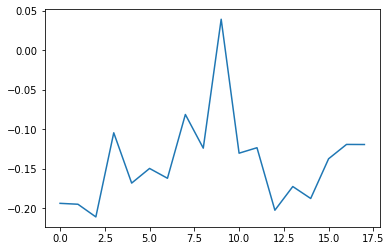

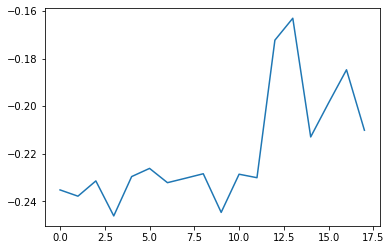

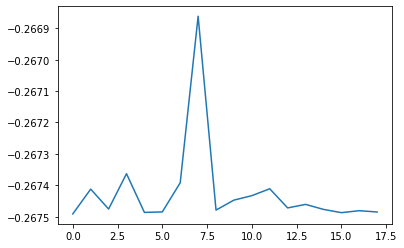

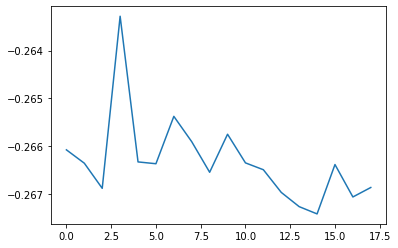

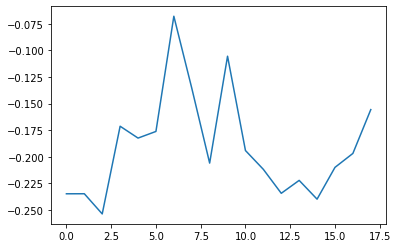

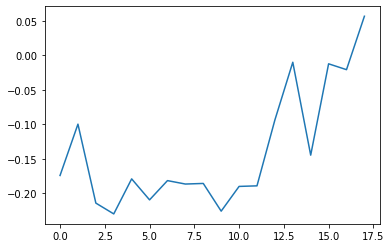

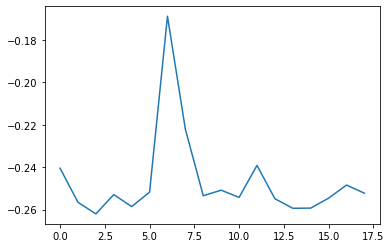

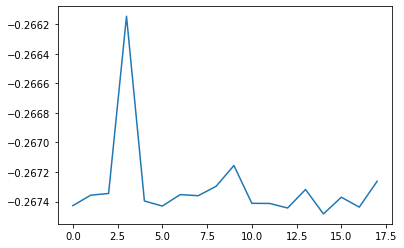

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


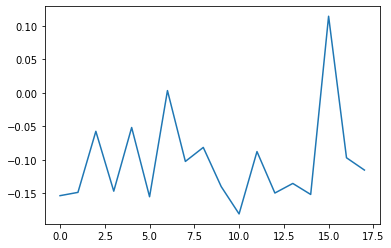

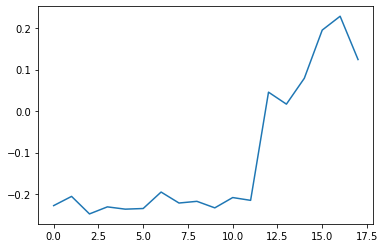

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


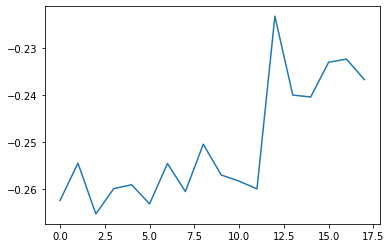

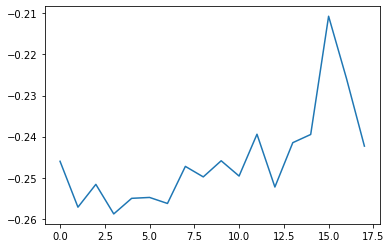

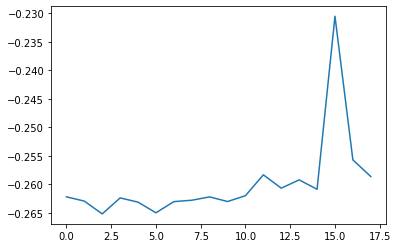

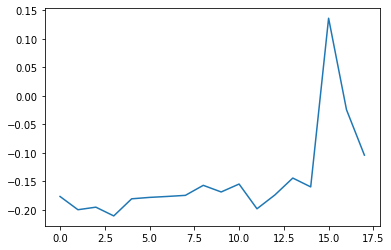

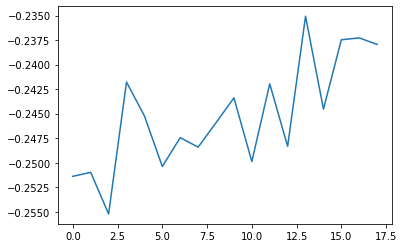

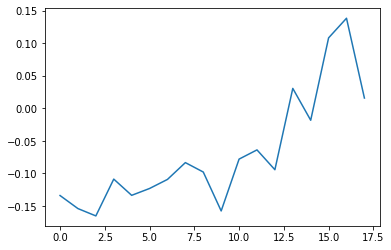

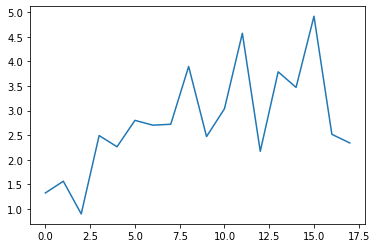

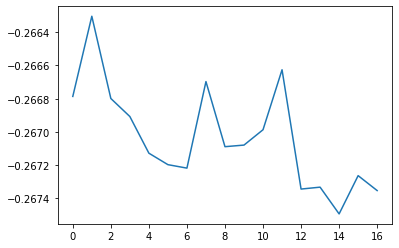

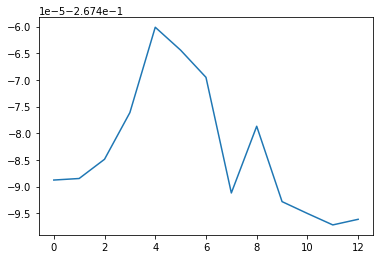

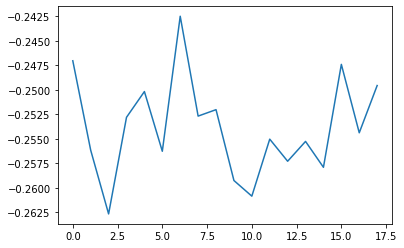

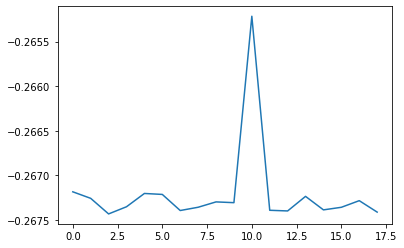

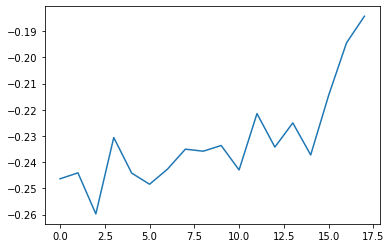

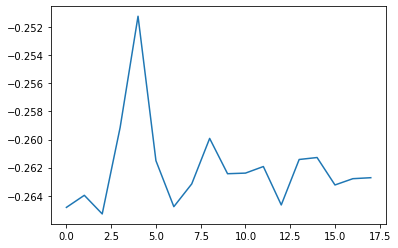

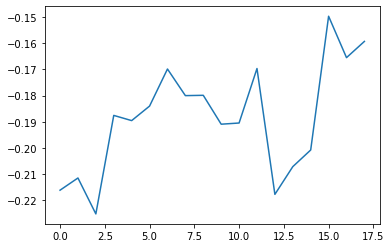

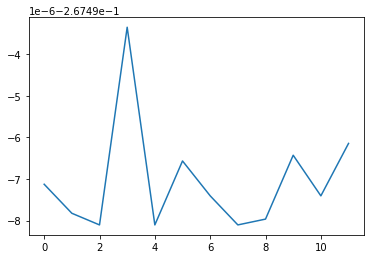

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


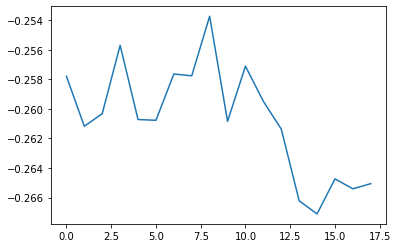

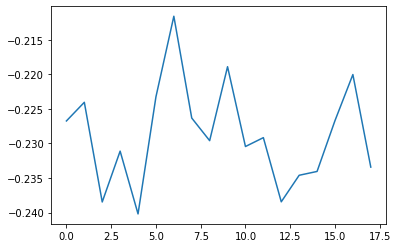

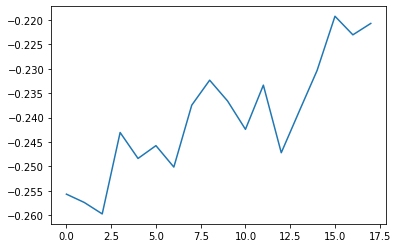

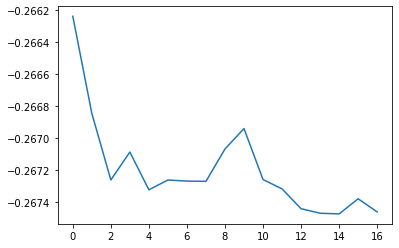

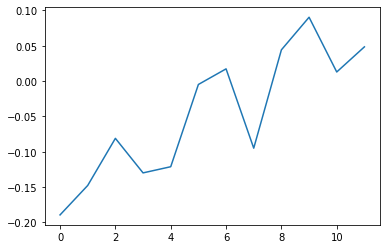

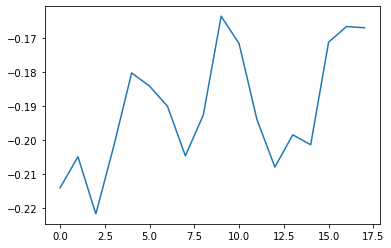

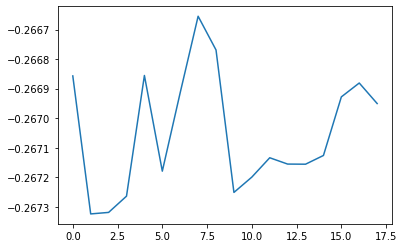

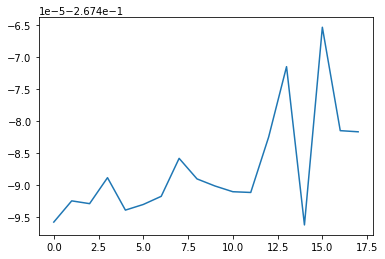

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


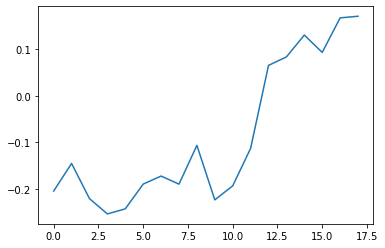

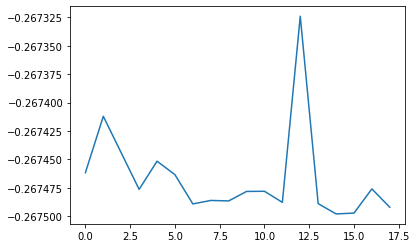

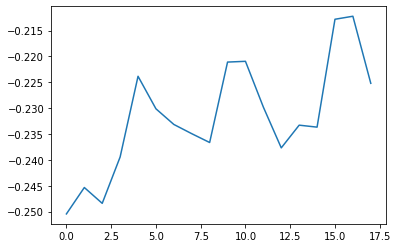

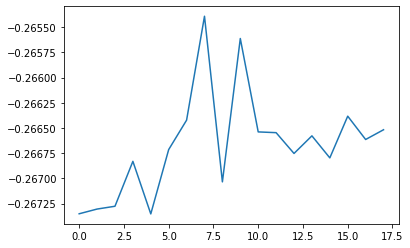

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


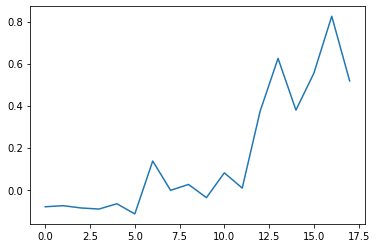

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


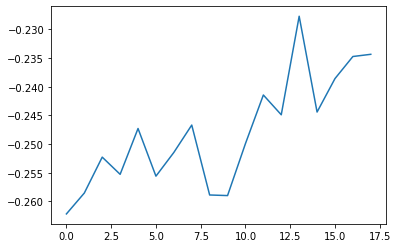

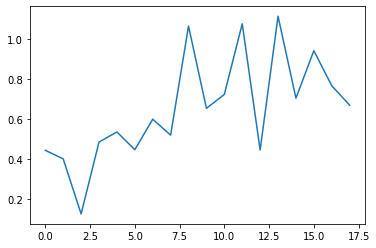

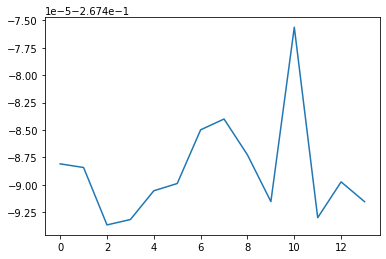

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


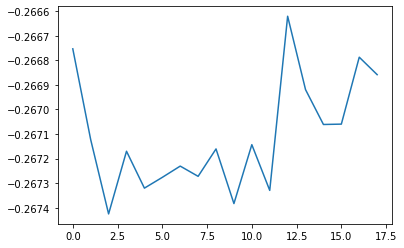

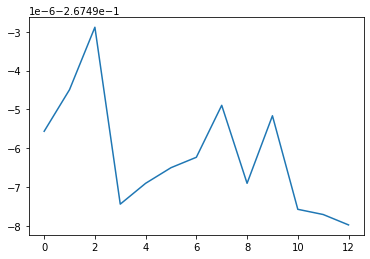

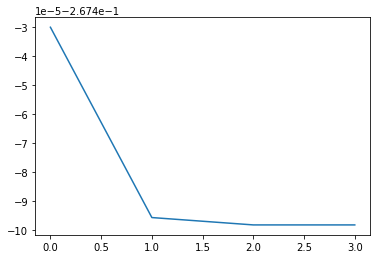

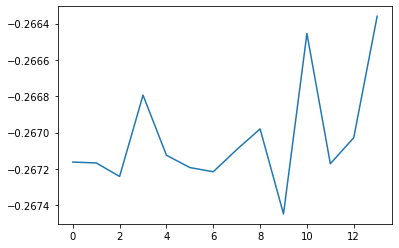

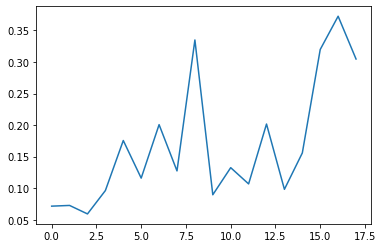

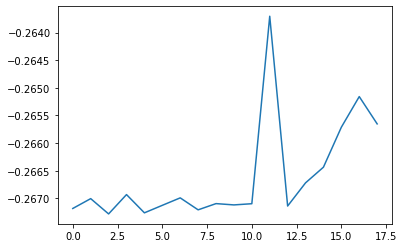

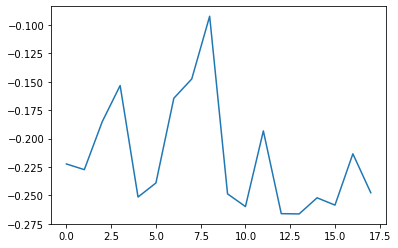

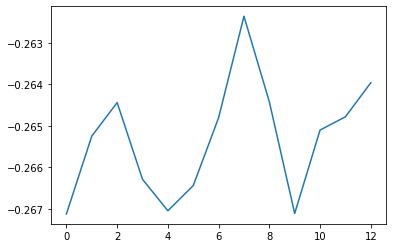

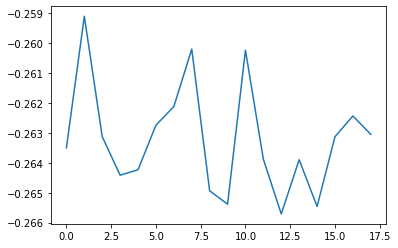

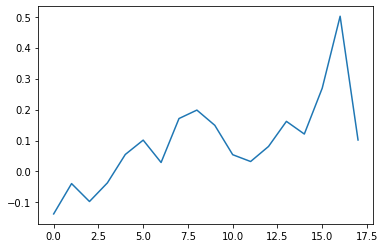

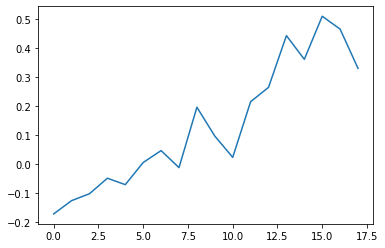

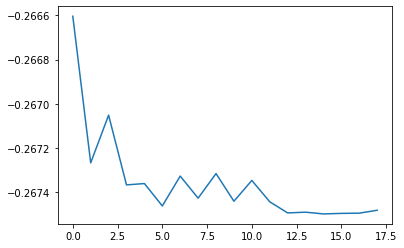

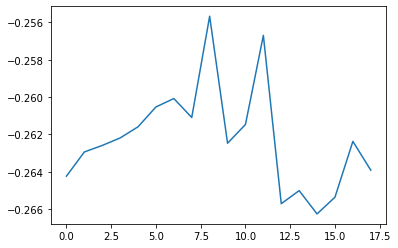

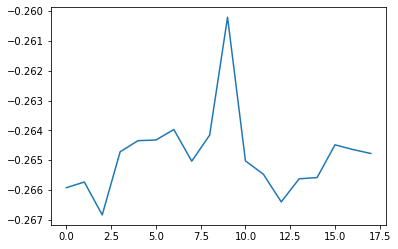

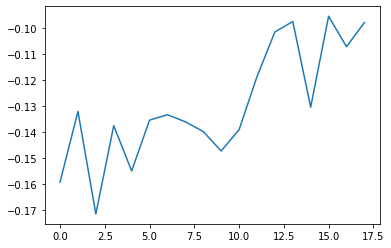

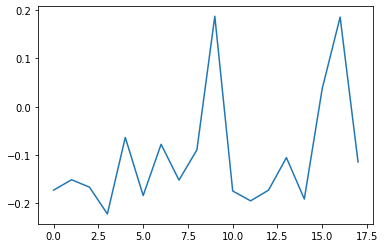

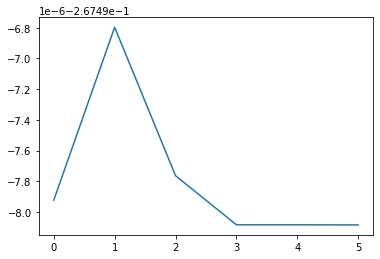

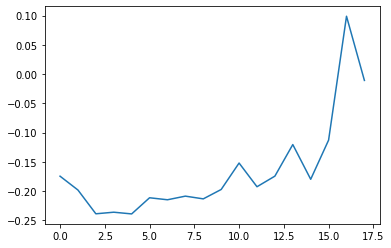

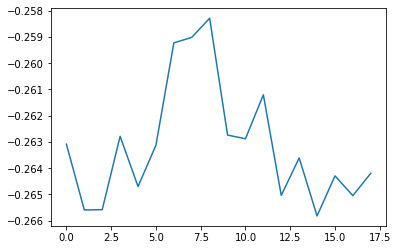

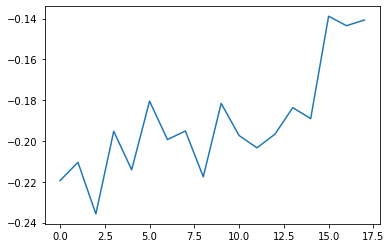

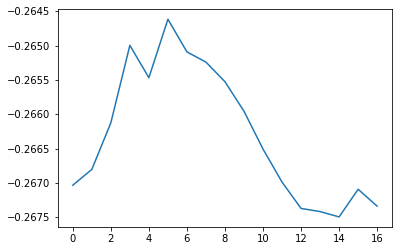

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


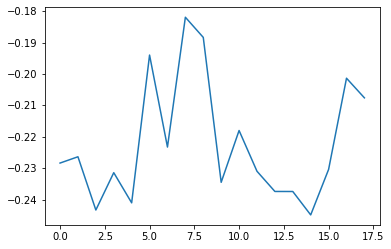

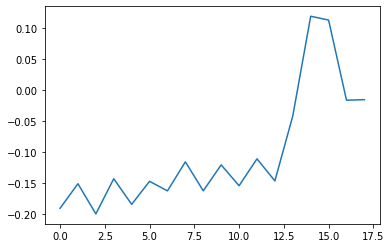

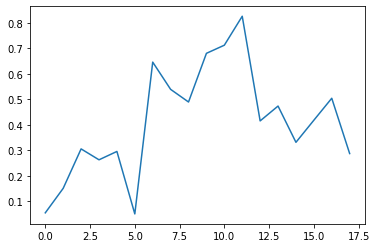

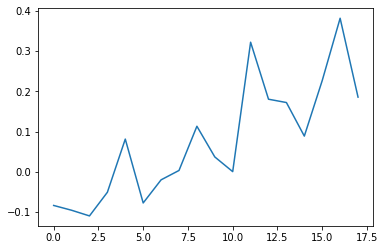

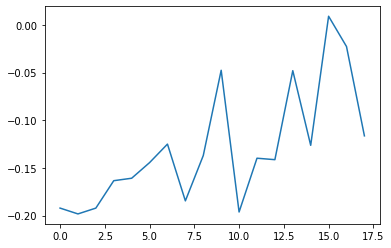

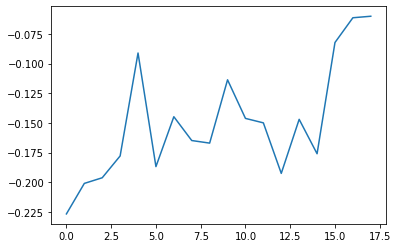

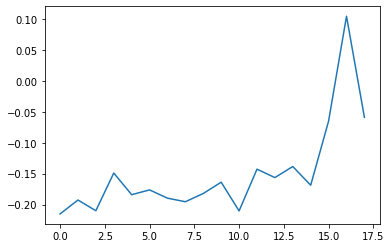

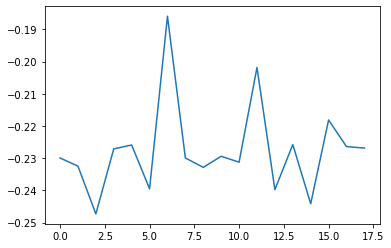

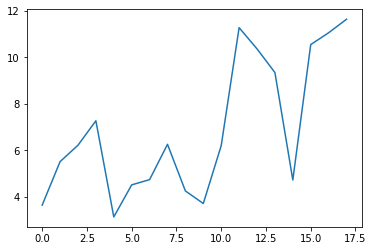

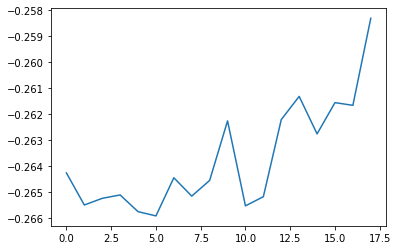

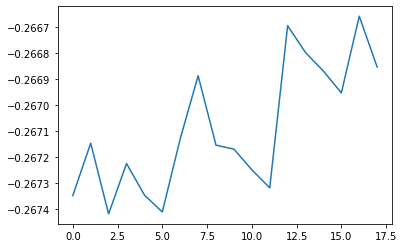

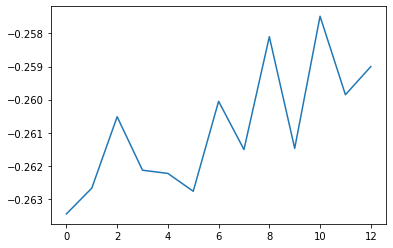

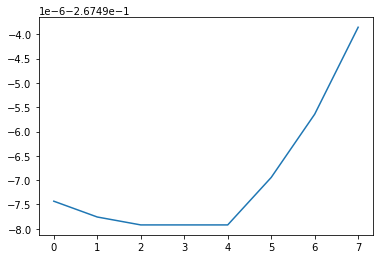

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


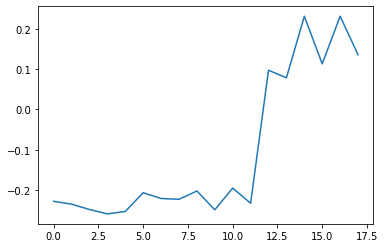

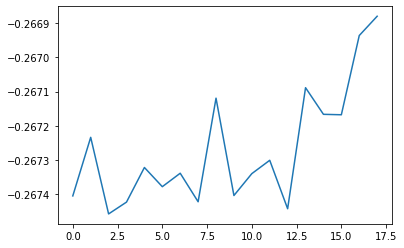

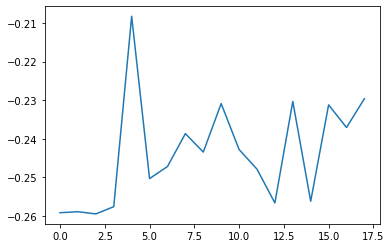

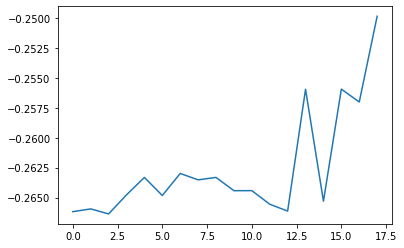

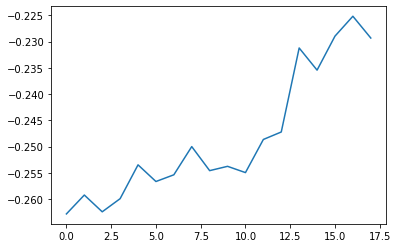

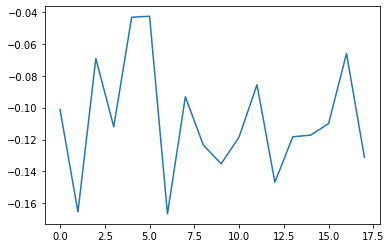

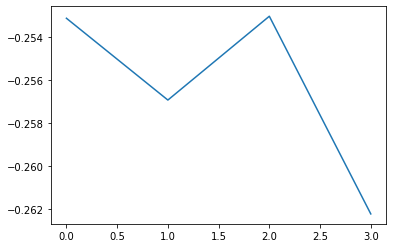

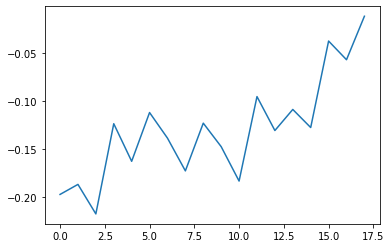

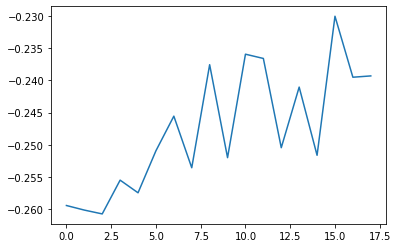

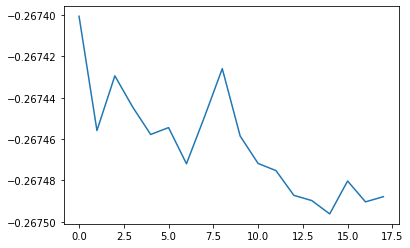

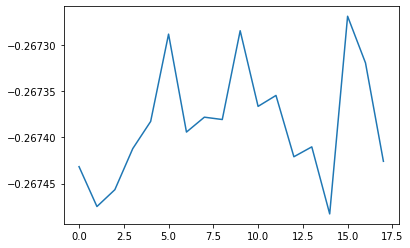

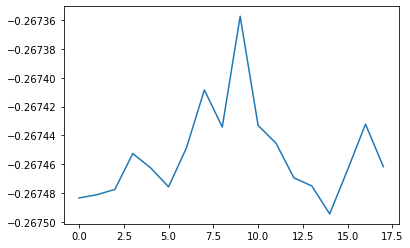

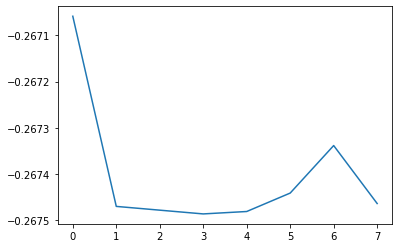

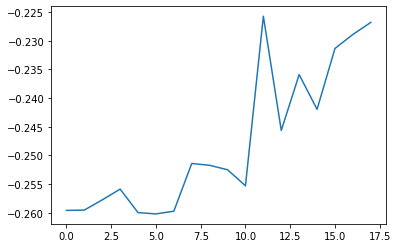

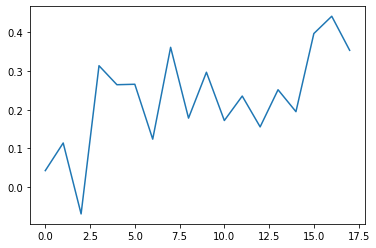

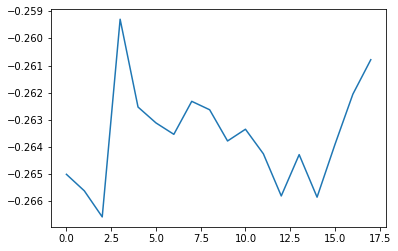

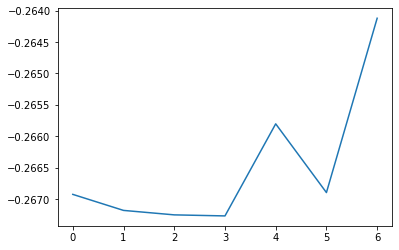

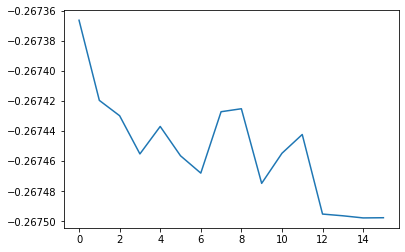

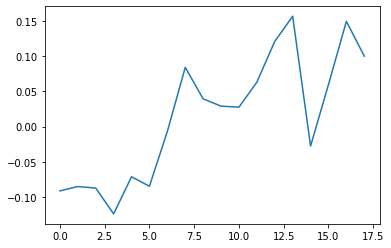

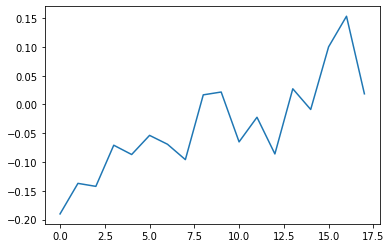

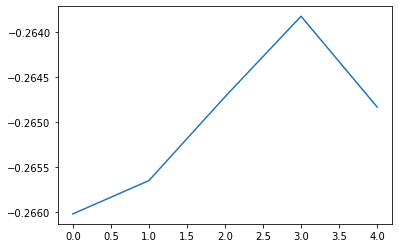

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


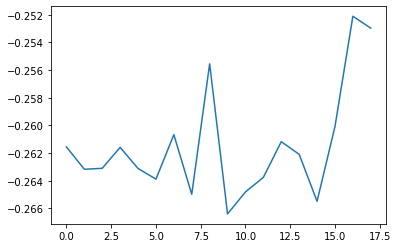

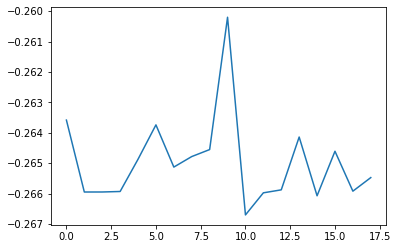

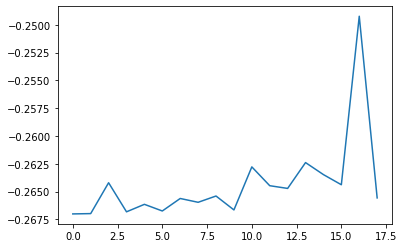

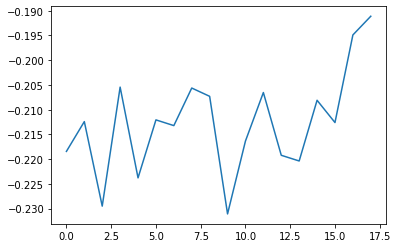

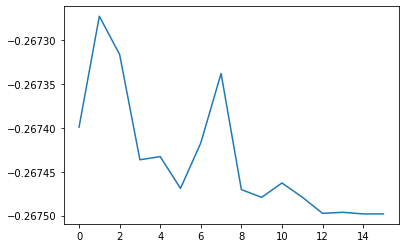

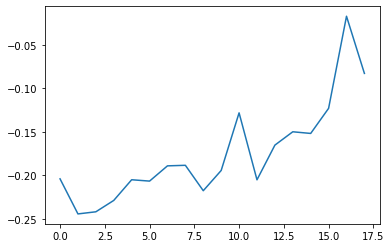

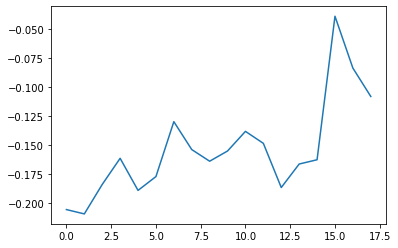

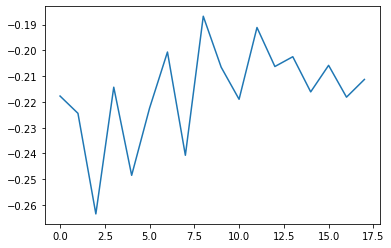

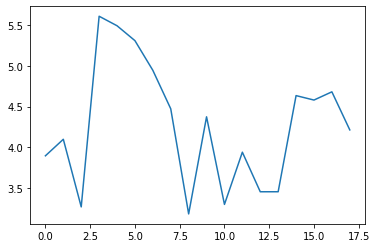

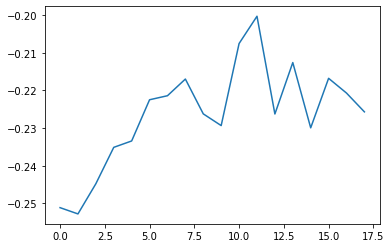

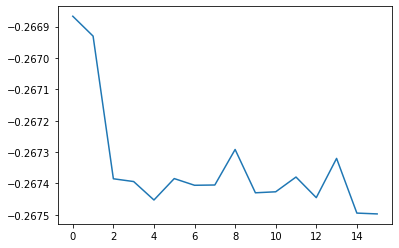

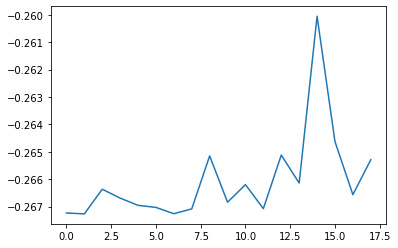

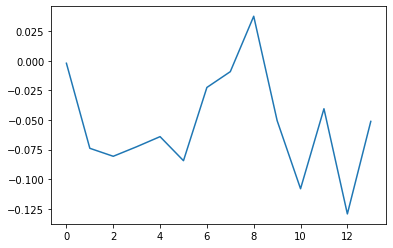

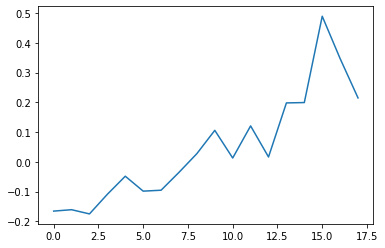

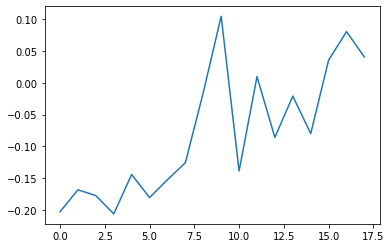

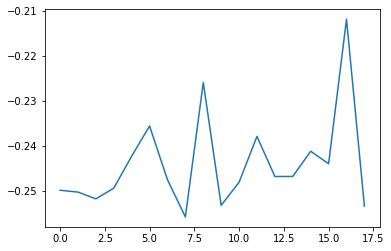

,Country,Actual,Predicted
0,Afghanistan,-0.267443,-0.267421
1,Albania,-0.263110,-0.263082
2,Algeria,-0.255154,-0.218670
3,Angola,0.251965,0.294049
4,Antigua and Barbuda,-0.267150,-0.267403
...,...,...,...
163,Vanuatu,-0.265289,-0.266216
164,"Venezuela, RB",-0.051245,-0.067905
165,Vietnam,0.214705,0.303922
166,Zambia,0.040780,0.000546


In [72]:
from statsmodels.tsa.arima_model import ARIMA

ts_df = df[['Time', 'Tree Loss (ha)']]
ts_df['Country'] = country_names
ts_df.index = ts_df['Country']
display(ts_df)
unique_names = list()
predictions = list()
expectations = list()
for name in ts_df.Country.unique():
  tmp_df = ts_df.loc[name, ['Time', 'Tree Loss (ha)']]
  time_index = tmp_df['Time']
  if (type(time_index) is np.int64):
    continue
  tmp_df.index = time_index
  del tmp_df['Time']
  vals = tmp_df.to_numpy().flatten()
  pyplot.plot(vals)
  pyplot.show()
  size = len(vals) - 1
  train, test = vals[:size], vals[size:]
  history = [x for x in train]
  model = ARIMA(history, order=(1,0,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  unique_names.append(name)
  predictions.append(yhat)
  expectations.append(test)

compare_df = pd.DataFrame({'Country' : unique_names, 'Actual': np.array(expectations).flatten(), 'Predicted': np.array(predictions).flatten()})
display(compare_df)

Root Mean Squared Error: 0.24868818358166667
R2 score: 0.977276284240119


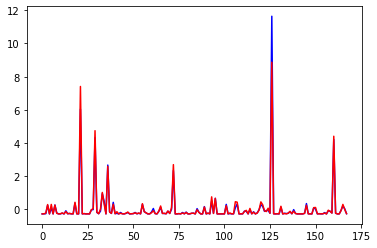

In [71]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(expectations, predictions)))
print('R2 score:', np.sqrt(metrics.r2_score(expectations, predictions)))
        
# plot forecasts against actual outcomes
pyplot.plot(expectations, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()